In [1]:
%reload_ext autoreload
%autoreload 2

import sys

import py21cmfast as p21c
from astropy.cosmology import Planck18

sys.path.append("..")
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [3]:
dd = evolve(
    run_name = 'test',
    z_start = 45.,
    z_end = 5.,
    zplusone_step_factor = 1.01,
    dm_params = DMParams(
        mode='swave',
        primary='phot_delta',
        m_DM=1e10,
        sigmav=1e-23,
        struct_boost_model='erfc 1e-3',
    ),
    enable_elec = False,
    tf_version = '230629',
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 64,
            BOX_LEN = 64 * 2, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om(0),
            OMb = Planck18.Ob(0),
            POWER_INDEX = Planck18.meta['n'],
            SIGMA_8 = Planck18.meta['sigma8'],
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    
    rerun_DH = False,
    clear_cache = True,
    use_tqdm = False,
    debug = True,
)

INFO:root:Using 21cmFAST version 0.1.dev1579+g6b1da6d.d20230914
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/test
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: Interpreter CUDA
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:root:Loaded photon propagation transfer function.
INFO:root:Loaded photon scattering transfer function.
INFO:root:Loaded photon deposition transfer function.
INFO:root:DarkHistoryWrapper: Found existing DarkHistory initial conditions.


step 0 z: 45.000->44.678 xray: 0.002 bath+dm: 2.115 21cmfast: 1.668 others: 1.657
step 1 z: 44.678->44.226 xray: 0.354 bath+dm: 0.070 

/n/home07/yitians/dm21cm/DM21cm/notebooks/../dm21cm/data_cacher.py:71: RuntimeWarning: invalid value encountered in divide
  W1 = 3*(np.sin(self.kMag*R1) - self.kMag*R1 * np.cos(self.kMag*R1)) /(self.kMag*R1)**3
/n/home07/yitians/dm21cm/DM21cm/notebooks/../dm21cm/data_cacher.py:72: RuntimeWarning: invalid value encountered in divide
  W2 = 3*(np.sin(self.kMag*R2) - self.kMag*R2 * np.cos(self.kMag*R2)) /(self.kMag*R2)**3


21cmfast: 1.307 others: 0.035
step 2 z: 44.226->43.778 xray: 0.690 bath+dm: 0.069 21cmfast: 1.309 others: 0.031
step 3 z: 43.778->43.335 xray: 1.046 bath+dm: 0.069 21cmfast: 1.306 others: 0.037
step 4 z: 43.335->42.896 xray: 1.399 bath+dm: 0.069 21cmfast: 1.290 others: 0.042
step 5 z: 42.896->42.461 xray: 1.712 bath+dm: 0.069 21cmfast: 1.275 others: 0.047
step 6 z: 42.461->42.031 xray: 2.035 bath+dm: 0.069 21cmfast: 1.269 others: 0.052
step 7 z: 42.031->41.605 xray: 2.326 bath+dm: 0.069 21cmfast: 1.262 others: 0.065
step 8 z: 41.605->41.183 xray: 2.345 bath+dm: 0.070 21cmfast: 1.322 others: 0.064
step 9 z: 41.183->40.766 xray: 2.333 bath+dm: 0.069 21cmfast: 1.303 others: 0.077
step 10 z: 40.766->40.352 xray: 2.292 bath+dm: 0.069 21cmfast: 1.271 others: 0.074
step 11 z: 40.352->39.943 xray: 2.311 bath+dm: 0.069 21cmfast: 1.266 others: 0.081
step 12 z: 39.943->39.537 xray: 2.289 bath+dm: 0.069 21cmfast: 1.345 others: 0.087
step 13 z: 39.537->39.136 xray: 2.297 bath+dm: 0.069 21cmfast: 1.

In [4]:
import numpy as np
import pickle

import matplotlib.pyplot as plt

In [5]:
ar0 = pickle.load(open("../outputs/tmp/records_test.p", 'rb'))
ar0 = {k: np.array([r[k] for r in ar0]) for k in ar0[0].keys()}

In [8]:
ar = np.load("../data/run_info/test_records.npy", allow_pickle=True).item()

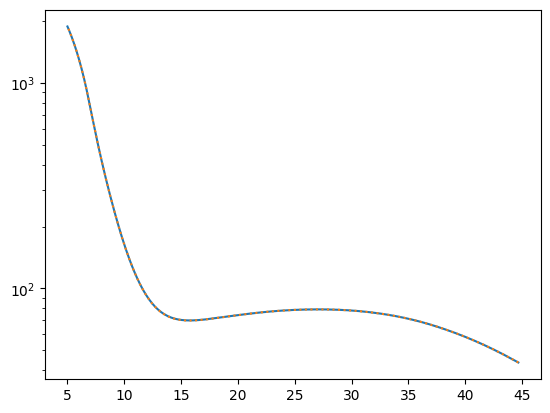

In [10]:
plt.plot(ar['z'], ar['T_k'])
plt.plot(ar0['z'], ar0['T_k'], ':')
plt.yscale('log')